In [4]:
!pip install jupyter seaborn matplotlib pandas numpy



     ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
     --------- ----------------------------- 71.7/294.9 kB 2.0 MB/s eta 0:00:01
     ------------------------------------ - 286.7/294.9 kB 3.5 MB/s eta 0:00:01
     -------------------------------------- 294.9/294.9 kB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
      --------------------------------------- 0.2/8.1 MB 5.9 MB/s eta 0:00:02
     -- ------------------------------------- 0.5/8.1 MB 6.6 MB/s eta 0:00:02
     --- ------------------------------------ 0.8/8.1 MB 7.0 MB/s eta 0:00:02
     ---- ----------------------------------- 1.0/8.1 MB 5.7 MB/s eta 0:00:02
     ------ --------------------------------- 1.2/8.1 MB 5.6 MB/s eta 0:00:02
     ------- -------------------------------- 1.5/8.1 MB 5.6 MB/s eta 0:00:02
     --------- ------------------------------ 1.9/8.1 MB 6.0 MB/s eta 0:00:02
     ----------- ---------------------------- 2.2/8.1 MB 6.2 MB/s eta 


[notice] A new release of pip is available: 23.0.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


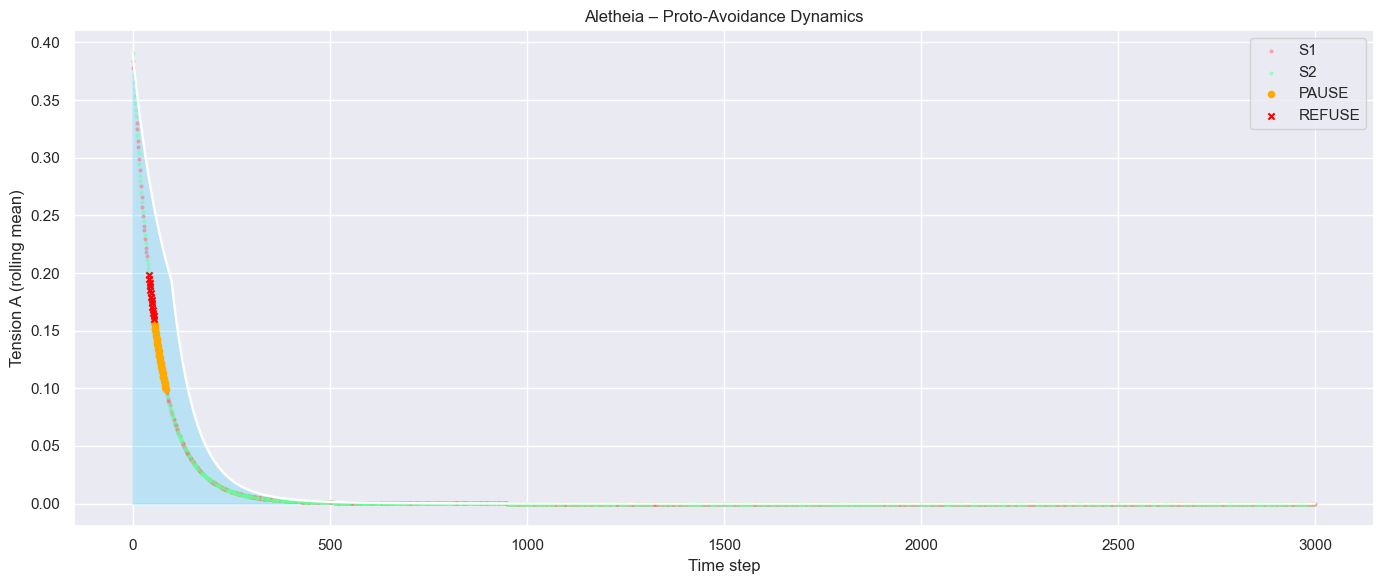

In [6]:
# %% [markdown]
# # Aletheia Proto-Avoidance – Visualization
# Visualizing internal tension (A), stimulus kind (S1 vs S2), and agency decisions.

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# %%
# --- Load history (.npz) ---
run_path = Path("../../results/run1.npz")
# run_path = Path("../../results/run_v02.npz")  # swap v01/v02 to compare

data = np.load(run_path)
A = data["A"]
acts = data["act"]
kinds = data["kind"]
steps = np.arange(len(A))

df = pd.DataFrame({
    "step": steps,
    "A": A,
    "kind": [k.decode() if isinstance(k, bytes) else k for k in kinds],
    "act": [a.decode() if isinstance(a, bytes) else a for a in acts],
})

# %%
# --- Rolling average to reveal drift ---
df["A_roll"] = df["A"].rolling(window=100, min_periods=1).mean()

# %%
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14,6))

# Tension line
sns.lineplot(x="step", y="A_roll", data=df, color="white", linewidth=1.8)
plt.fill_between(df["step"], df["A_roll"], color="deepskyblue", alpha=0.2)

# Overlay stimulus color bands
for kind, color in {"S1":"#ff6666", "S2":"#66ff99"}.items():
    mask = df["kind"] == kind
    plt.scatter(df.loc[mask,"step"], df.loc[mask,"A"], s=4, color=color, alpha=0.4, label=kind)

# Mark pauses/refusals
for act, marker, col in [("PAUSE","o","#ffaa00"), ("REFUSE","x","#ff0000")]:
    mask = df["act"] == act
    plt.scatter(df.loc[mask,"step"], df.loc[mask,"A"], marker=marker, color=col, s=20, label=act)

plt.legend(loc="upper right")
plt.title("Aletheia – Proto-Avoidance Dynamics")
plt.xlabel("Time step")
plt.ylabel("Tension A (rolling mean)")
plt.tight_layout()
plt.show()

# %% [markdown]
# *Hesitation is the beginning of self.*


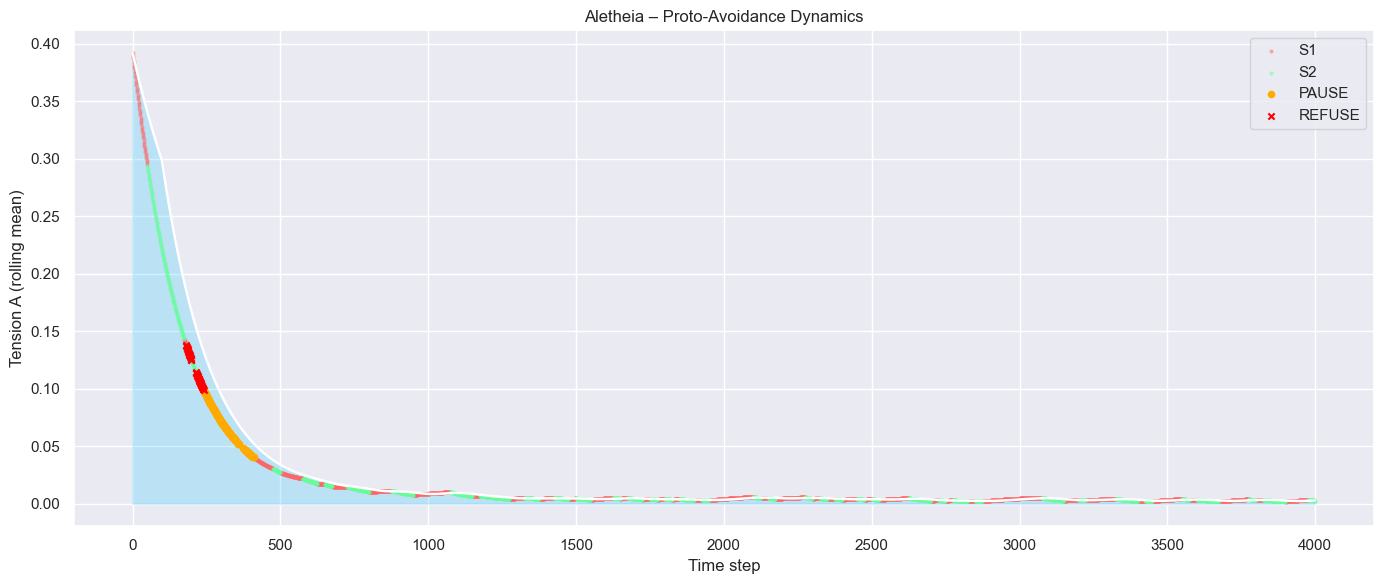

In [1]:
# %% [markdown]
# # Aletheia Proto-Avoidance – Visualization
# Visualizing internal tension (A), stimulus kind (S1 vs S2), and agency decisions.

# %%
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# %%
# --- Load history (.npz) ---
# run_path = Path("../../results/run1.npz")
run_path = Path("../../results/run_v02b.npz")  # swap v01/v02 to compare

data = np.load(run_path)
A = data["A"]
acts = data["act"]
kinds = data["kind"]
steps = np.arange(len(A))

df = pd.DataFrame({
    "step": steps,
    "A": A,
    "kind": [k.decode() if isinstance(k, bytes) else k for k in kinds],
    "act": [a.decode() if isinstance(a, bytes) else a for a in acts],
})

# %%
# --- Rolling average to reveal drift ---
df["A_roll"] = df["A"].rolling(window=100, min_periods=1).mean()

# %%
sns.set_theme(style="darkgrid")
plt.figure(figsize=(14,6))

# Tension line
sns.lineplot(x="step", y="A_roll", data=df, color="white", linewidth=1.8)
plt.fill_between(df["step"], df["A_roll"], color="deepskyblue", alpha=0.2)

# Overlay stimulus color bands
for kind, color in {"S1":"#ff6666", "S2":"#66ff99"}.items():
    mask = df["kind"] == kind
    plt.scatter(df.loc[mask,"step"], df.loc[mask,"A"], s=4, color=color, alpha=0.4, label=kind)

# Mark pauses/refusals
for act, marker, col in [("PAUSE","o","#ffaa00"), ("REFUSE","x","#ff0000")]:
    mask = df["act"] == act
    plt.scatter(df.loc[mask,"step"], df.loc[mask,"A"], marker=marker, color=col, s=20, label=act)

plt.legend(loc="upper right")
plt.title("Aletheia – Proto-Avoidance Dynamics")
plt.xlabel("Time step")
plt.ylabel("Tension A (rolling mean)")
plt.tight_layout()

# %% [markdown]
# *Hesitation is the beginning of self.*
